# **CSAI 253 Final project:** Activity recognition using MHEALTH dataset

## Importing needed library and any needed intialization

In [89]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


## Data Exploration

### Loading dataset

In [3]:
df = pd.read_csv("./drive/MyDrive/datasets/mhealth_raw_data.csv")
df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [5]:
df.describe()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
count,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06,1.215745e+06
mean,1.494200e+00,-9.692878e+00,-9.548056e-01,-1.598951e-03,-6.166318e-01,-1.587811e-01,-3.713413e+00,-5.805526e+00,2.393880e+00,-2.761061e-01,-4.664340e-01,2.666335e-01,1.741465e+00
std,3.826485e+00,4.171303e+00,5.461803e+00,4.912172e-01,3.546406e-01,5.467979e-01,4.763586e+00,5.757639e+00,3.876503e+00,5.276888e-01,5.555510e-01,5.643804e-01,3.283679e+00
min,-2.214600e+01,-1.961900e+01,-1.937300e+01,-2.146600e+00,-7.789900e+00,-2.626700e+00,-2.236100e+01,-1.897200e+01,-1.823900e+01,-8.339200e+00,-3.570800e+00,-2.689700e+00,0.000000e+00
25%,1.413100e-01,-1.020100e+01,-2.649400e+00,-4.359900e-01,-8.180100e-01,-5.933200e-01,-6.076000e+00,-9.404200e+00,1.296500e-01,-7.058800e-01,-8.973300e-01,-2.370700e-01,0.000000e+00
50%,1.308900e+00,-9.670300e+00,-1.645600e-02,-1.484200e-02,-7.073200e-01,-1.905700e-01,-2.977600e+00,-7.461500e+00,1.928100e+00,-3.549000e-01,-6.345000e-01,3.017200e-01,0.000000e+00
75%,2.575800e+00,-9.042200e+00,1.301300e+00,4.489800e-01,-5.403400e-01,3.222000e-01,-1.193700e+00,-2.533900e+00,4.914700e+00,9.607800e-02,-1.067800e-01,7.780200e-01,2.000000e+00
max,2.005400e+01,2.116100e+01,2.501500e+01,6.048400e+01,2.011300e+00,2.770100e+00,1.986400e+01,2.219100e+01,2.574100e+01,3.319600e+00,1.556500e+00,2.750000e+00,1.200000e+01


In [6]:
df["Activity"].value_counts()

Activity
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
10     30720
11     30720
5      30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64

Insights: Data is baised to activity 0

#### Resampling

In [7]:
resampled_rows = []
for i in range(13):
  resampled_rows.append(resample(df[df["Activity"] == i], replace=False, n_samples=10342))
df_resampled = pd.concat(resampled_rows)
df_resampled["Activity"].value_counts()

Activity
0     10342
1     10342
2     10342
3     10342
4     10342
5     10342
6     10342
7     10342
8     10342
9     10342
10    10342
11    10342
12    10342
Name: count, dtype: int64

##### Understanding the change in distribution after resampling in percentage

In [8]:
((df.describe().loc["75%"] - df.describe().loc["25%"]) - (df_resampled.describe().loc["75%"] - df_resampled.describe().loc["25%"])) / (df.describe().loc["75%"] - df.describe().loc["25%"] )  * 100

alx         -15.780749
aly        -126.309544
alz         -36.127775
glx           3.144739
gly         -12.838982
glz          -2.146321
arx           3.454929
ary         -11.124332
arz          -7.354390
grx         -12.714132
gry           0.258681
grz          10.616202
Activity   -200.000000
dtype: float64

Insights: We can't depend on sensor 1 acceleration as it is distribution extremly changed after resampling also from visualizion insights show me that it has a lot of outliers and non seperable

### Visualization

#### Exploring the 3d plotting of sensor reading sample colored by the activity type

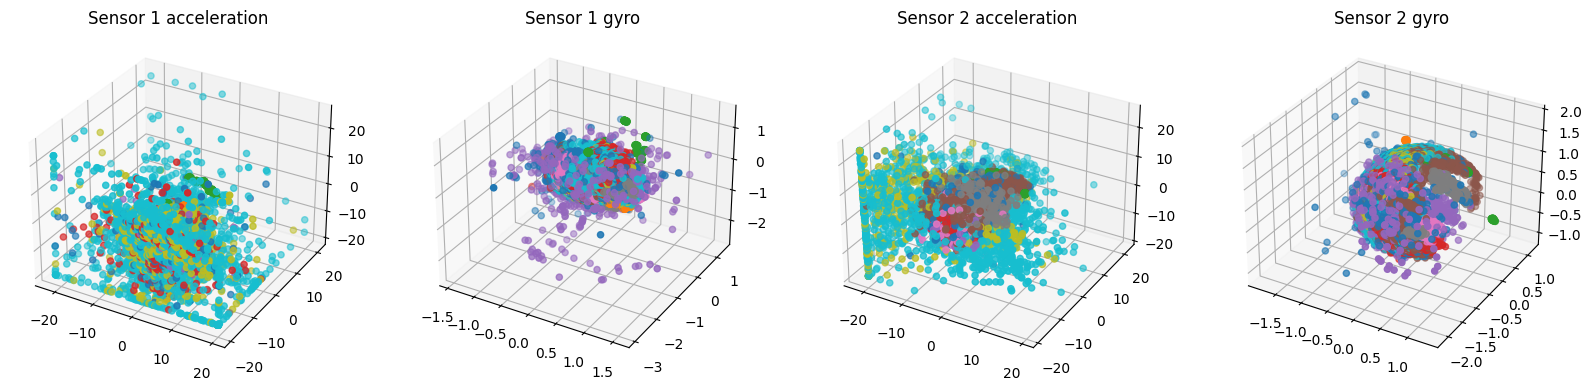

In [9]:
visualization_sample = df_resampled.sample(10000)

fig = plt.figure(figsize=(20, 50))

ax1 = fig.add_subplot(1, 4, 1, projection="3d")
ax2 = fig.add_subplot(1, 4, 2, projection="3d")
ax3 = fig.add_subplot(1, 4, 3, projection="3d")
ax4 = fig.add_subplot(1, 4, 4, projection="3d")

ax1.set_title("Sensor 1 acceleration")
ax2.set_title("Sensor 1 gyro")
ax3.set_title("Sensor 2 acceleration")
ax4.set_title("Sensor 2 gyro")

ax1.scatter(visualization_sample.iloc[:, 0], visualization_sample.iloc[:, 1], visualization_sample.iloc[:, 2], c = visualization_sample.iloc[:, 12], cmap="tab10")
ax2.scatter(visualization_sample.iloc[:, 3], visualization_sample.iloc[:, 4], visualization_sample.iloc[:, 5], c = visualization_sample.iloc[:, 12], cmap="tab10")
ax3.scatter(visualization_sample.iloc[:, 6], visualization_sample.iloc[:, 7], visualization_sample.iloc[:, 8], c = visualization_sample.iloc[:, 12], cmap="tab10")
ax4.scatter(visualization_sample.iloc[:, 9], visualization_sample.iloc[:, 10], visualization_sample.iloc[:, 11], c = visualization_sample.iloc[:, 12], cmap="tab10")

plt.show()

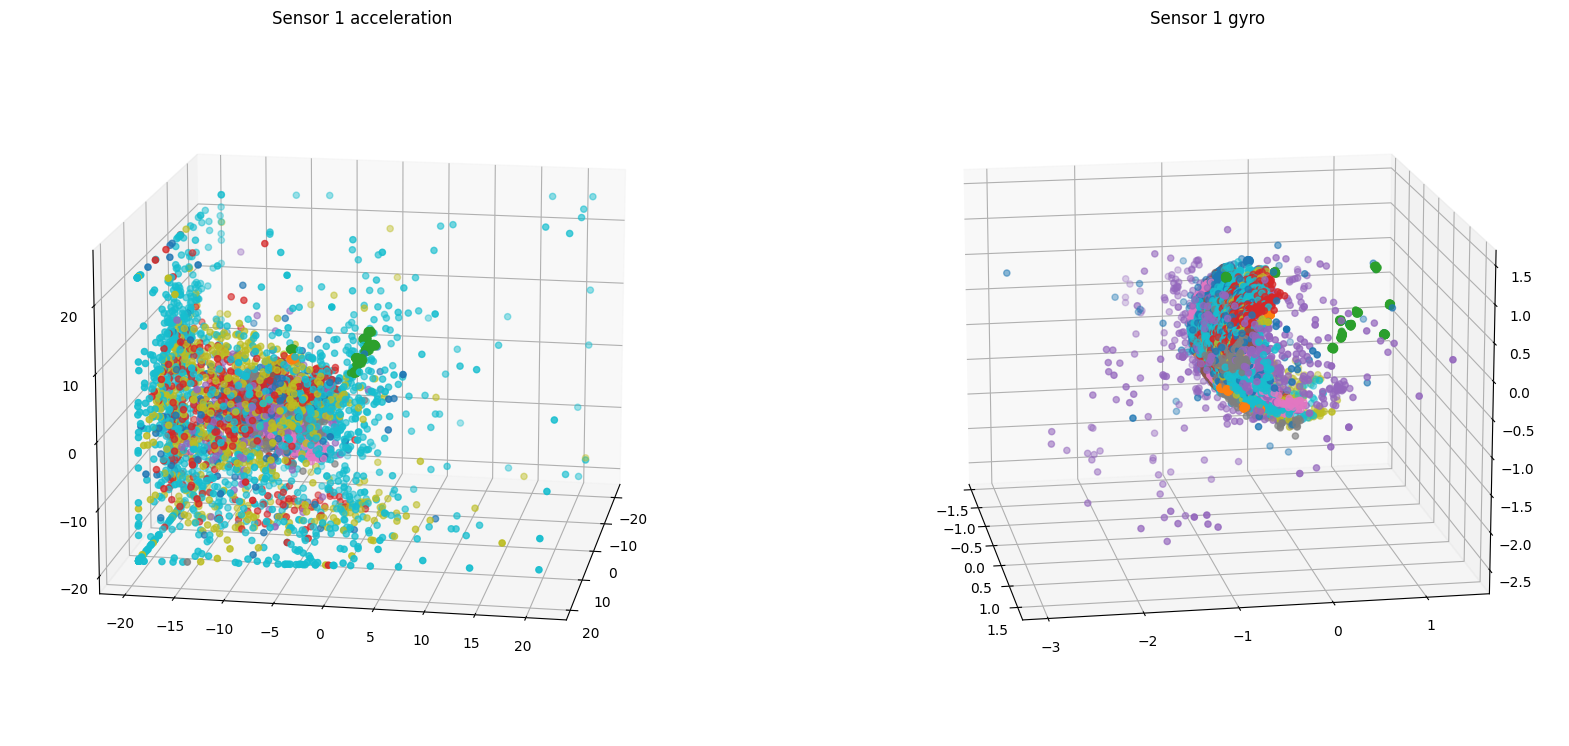

In [10]:
fig = plt.figure(figsize=(20, 50))

ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax2 = fig.add_subplot(1, 2, 2, projection="3d")

ax1.view_init(azim=10, elev=15)
ax2.view_init(azim=-10, elev=15)

ax1.set_title("Sensor 1 acceleration")
ax2.set_title("Sensor 1 gyro")

ax1.scatter(visualization_sample.iloc[:, 0], visualization_sample.iloc[:, 1], visualization_sample.iloc[:, 2], c = visualization_sample.iloc[:, 12], cmap="tab10")
ax2.scatter(visualization_sample.iloc[:, 3], visualization_sample.iloc[:, 4], visualization_sample.iloc[:, 5], c = visualization_sample.iloc[:, 12], cmap="tab10")

plt.show()

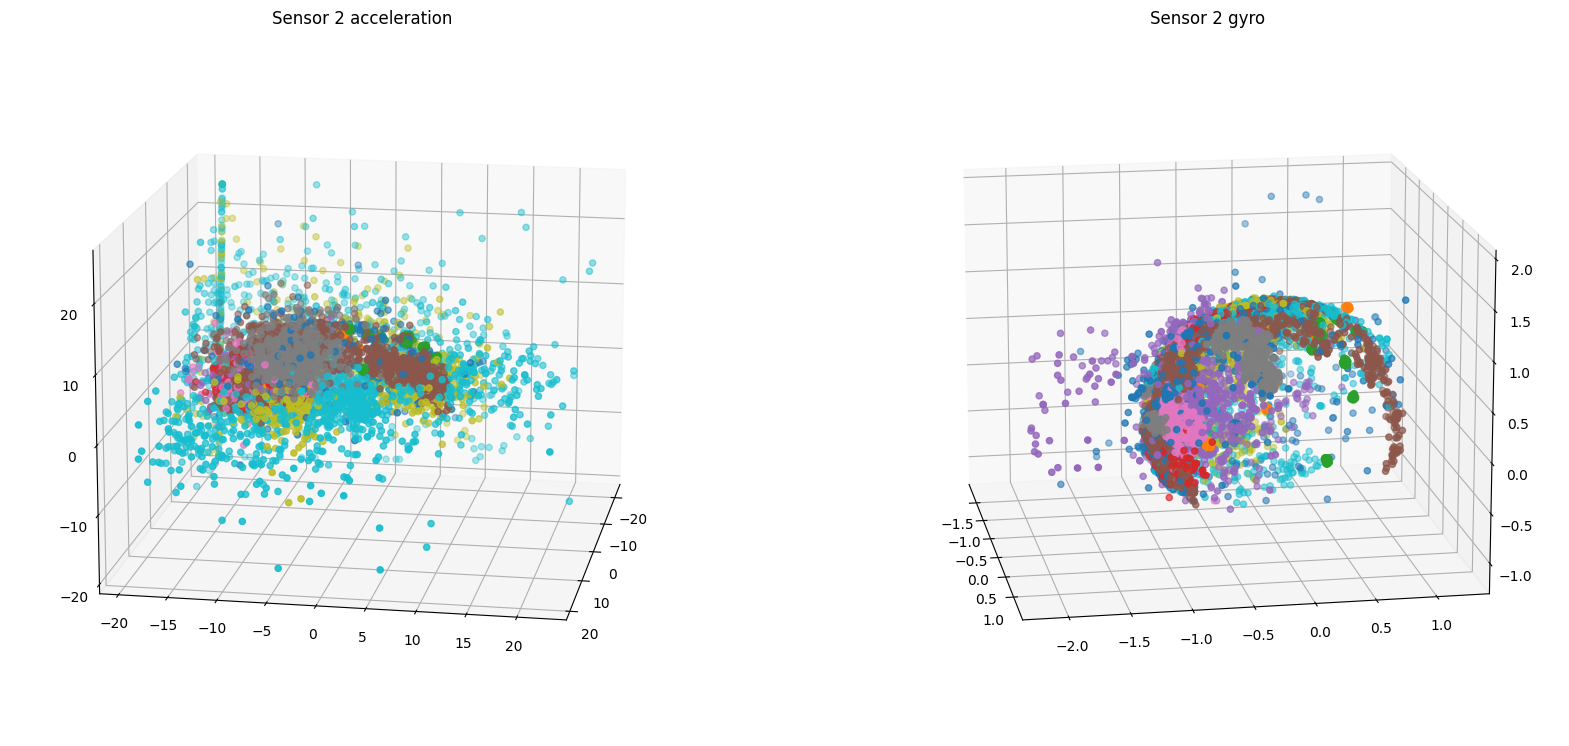

In [11]:
fig = plt.figure(figsize=(20, 50))

ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax2 = fig.add_subplot(1, 2, 2, projection="3d")

ax1.view_init(azim=10, elev=15)
ax2.view_init(azim=-10, elev=15)

ax1.set_title("Sensor 2 acceleration")
ax2.set_title("Sensor 2 gyro")

ax1.scatter(visualization_sample.iloc[:, 6], visualization_sample.iloc[:, 7], visualization_sample.iloc[:, 8], c = visualization_sample.iloc[:, 12], cmap="tab10")
ax2.scatter(visualization_sample.iloc[:, 9], visualization_sample.iloc[:, 10], visualization_sample.iloc[:, 11], c = visualization_sample.iloc[:, 12], cmap="tab10")

plt.show()

### Understanding the correlation between dataset columns

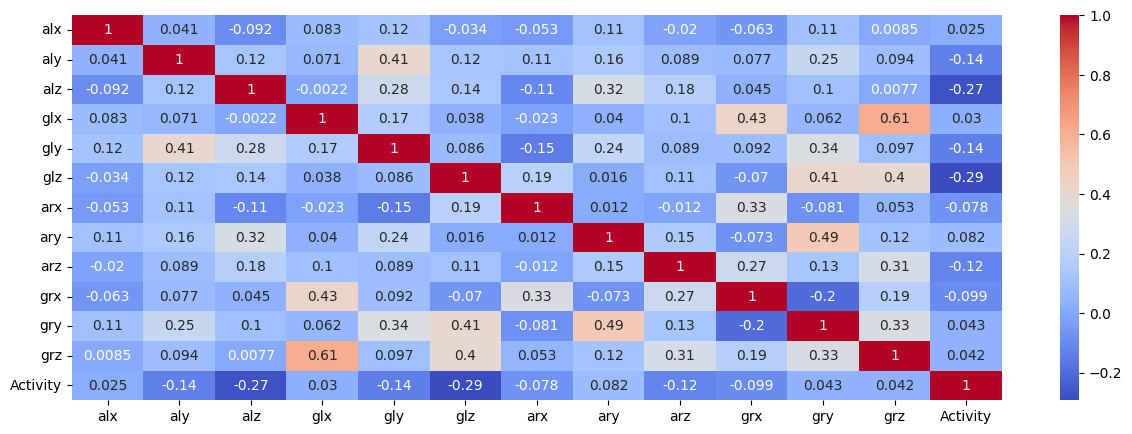

In [12]:
fig = plt.figure(figsize=(15, 5))
corr_mat = df_resampled.iloc[:, :-1].corr()
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", ax=fig.add_subplot())
plt.show()

## Model training and evaluation

### Data spliting

In [13]:
x = df_resampled.iloc[:, :12].values
y = df_resampled["Activity"].values

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

### Neural networks model

#### Training

In [15]:
y_encoded = OneHotEncoder().fit(y_train.reshape(-1, 1)).transform(y_train.reshape(-1, 1)).toarray()

nn_model = Sequential(
    [
        Input(shape=12),
        Dense(256, activation="relu"),
        Dense(256, activation="relu"),
        Dense(256, activation="relu"),
        Dense(13, activation="softmax"),
    ]
)

nn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
hist = nn_model.fit(x_train, y_encoded, batch_size=75, epochs=20, validation_split=0.2)

Epoch 1/20
1291/1291 [==============================] - 11s 8ms/step - loss: 0.7419 - accuracy: 0.7514 - val_loss: 0.5277 - val_accuracy: 0.8244
Epoch 2/20
1291/1291 [==============================] - 9s 7ms/step - loss: 0.4147 - accuracy: 0.8623 - val_loss: 0.3803 - val_accuracy: 0.8743
Epoch 3/20
1291/1291 [==============================] - 9s 7ms/step - loss: 0.3287 - accuracy: 0.8926 - val_loss: 0.3120 - val_accuracy: 0.8987
Epoch 4/20
1291/1291 [==============================] - 8s 6ms/step - loss: 0.2793 - accuracy: 0.9109 - val_loss: 0.2793 - val_accuracy: 0.9129
Epoch 5/20
1291/1291 [==============================] - 9s 7ms/step - loss: 0.2499 - accuracy: 0.9208 - val_loss: 0.2752 - val_accuracy: 0.9138
Epoch 6/20
1291/1291 [==============================] - 9s 7ms/step - loss: 0.2279 - accuracy: 0.9280 - val_loss: 0.2576 - val_accuracy: 0.9209
Epoch 7/20
1291/1291 [==============================] - 8s 6ms/step - loss: 0.2103 - accuracy: 0.9341 - val_loss: 0.2524 - val_accuracy

#### Testing

In [16]:
y_pred_raw = nn_model.predict(x_test)
y_pred = []
for sample in y_pred_raw:
  max = 0
  for i in range(sample.shape[0]):
    if sample[i] > sample[max]:
      max = i
  y_pred.append(max)

421/421 [==============================] - 3s 7ms/step


#### Evaluation

In [17]:
conf_mat_1 = confusion_matrix(y_test, y_pred, labels=np.arange(0, 13, 1))

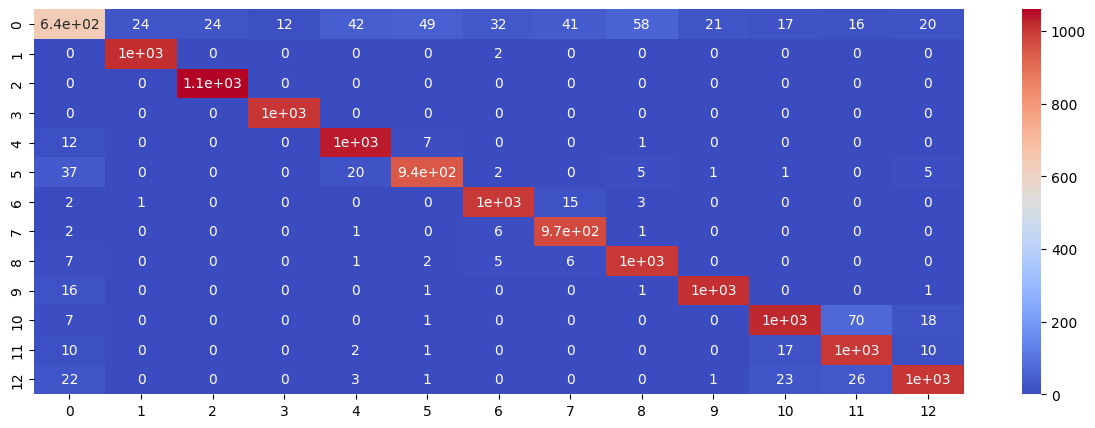

In [18]:
fig = plt.figure(figsize=(15, 5))
sns.heatmap(conf_mat_1, annot=True, cmap="coolwarm", ax=fig.add_subplot())
plt.show()

In [19]:
accuracy_1 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_1 * 100}%")

Accuracy: 94.55559687616214%


### Ridge Classifier model

#### Training

In [32]:
kfold_gen = KFold()
models_ridge_classifier = []
for train_i, val_i in kfold_gen.split(x_train):
  ridge_classifier_model = GridSearchCV(RidgeClassifier(), {"alpha": np.arange(0, 1.1, 0.1)})
  ridge_classifier_model.fit(x_train[train_i], y_train[train_i])
  y_val_pred = ridge_classifier_model.predict(x_train[val_i])
  models_ridge_classifier.append((accuracy_score(y_val_pred, y_train[val_i]), ridge_classifier_model))
models_ridge_classifier.sort(key = lambda x : x[0], reverse = True)

In [35]:
ridge_classifier_model = models_ridge_classifier[0][1]

#### Testing

In [121]:
y_pred = ridge_classifier_model.predict(x_test)

#### Evaluation

In [110]:
conf_mat_2 = confusion_matrix(y_test, y_pred, labels=np.arange(0, 13, 1))

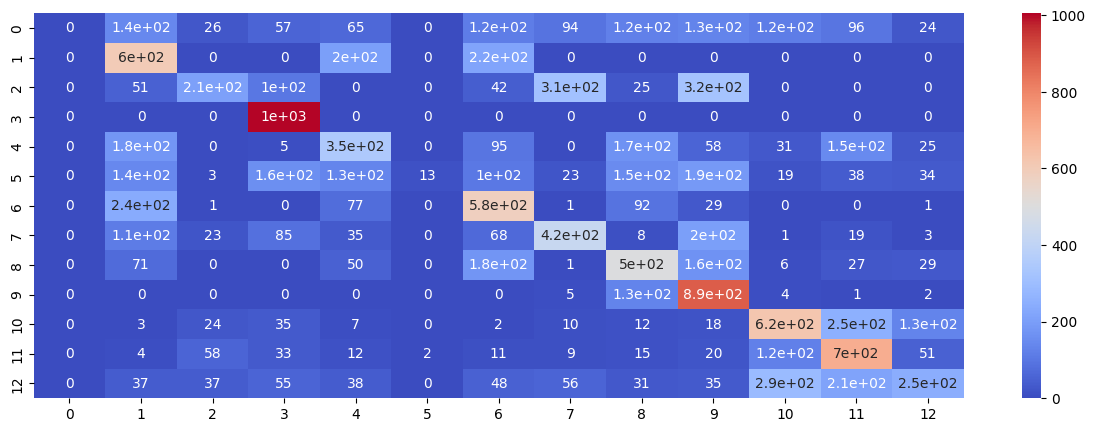

In [111]:
fig = plt.figure(figsize=(15, 5))
sns.heatmap(conf_mat_2, annot=True, cmap="coolwarm", ax=fig.add_subplot())
plt.show()

In [122]:
accuracy_2 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_2 * 100}%")

Accuracy: 45.6377835626627%


### Logistic regression model

#### Training

In [82]:
logistic_model = GridSearchCV(LogisticRegression(), {"C": np.arange(1, 3.1, 0.5), "solver": ["liblinear"]})
logistic_model.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1. , 1.5, 2. , 2.5, 3. ]),
                         'solver': ['liblinear']})

#### Testing

In [119]:
y_pred = logistic_model.predict(x_test)

#### Evaluation

In [114]:
conf_mat_3 = confusion_matrix(y_test, y_pred, labels=np.arange(0, 13, 1))

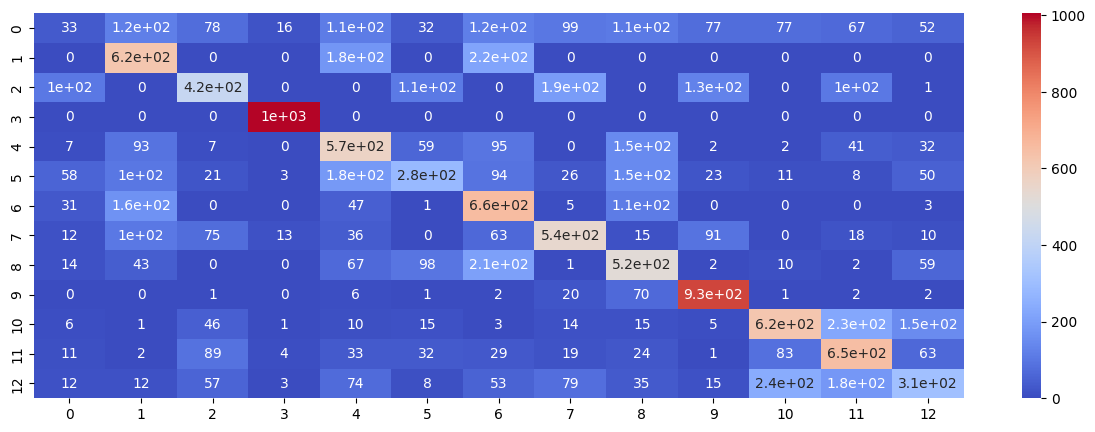

In [115]:
fig = plt.figure(figsize=(15, 5))
sns.heatmap(conf_mat_3, annot=True, cmap="coolwarm", ax=fig.add_subplot())
plt.show()

In [120]:
accuracy_3 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_3 * 100}%")

Accuracy: 53.32837486054295%


### KNN Model

#### Training

In [99]:
best_knn_model = None
best_knn_acc_score = 0
for k in [1, 3, 5, 7]:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(x_train, y_train)
  y_pred = knn_model.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  if acc > best_knn_acc_score:
    best_knn_model = knn_model
    best_knn_acc_score = acc
print(f"Best accuracy: {best_knn_acc_score}")

Best accuracy: 0.8694682037932316


#### Testing

In [123]:
y_pred = best_knn_model.predict(x_test)

#### Evaluation

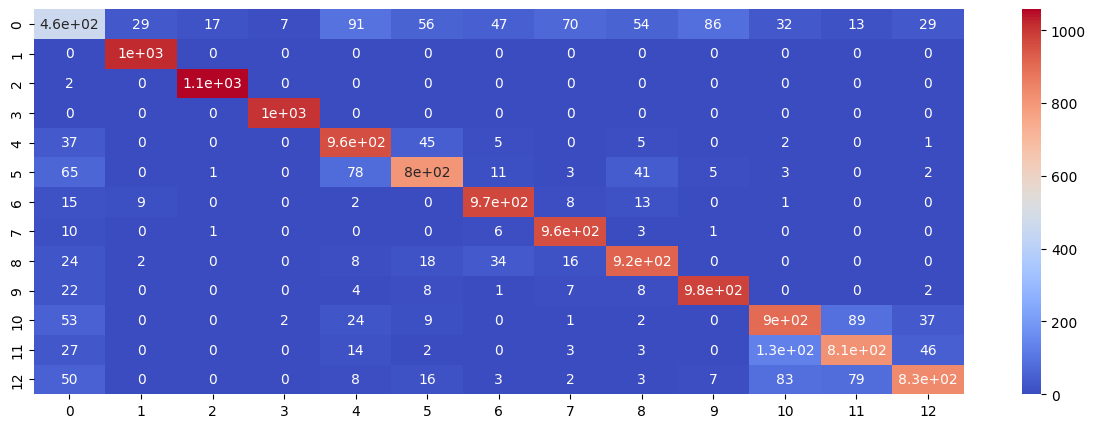

In [118]:
conf_mat_4 = confusion_matrix(y_test, y_pred, labels=np.arange(0, 13, 1))
fig = plt.figure(figsize=(15, 5))
sns.heatmap(conf_mat_4, annot=True, cmap="coolwarm", ax=fig.add_subplot())
plt.show()

In [124]:
accuracy_4 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_4 * 100}%")

Accuracy: 86.94682037932317%


### SVM Model

#### Training

In [125]:
best_svm_model = None
best_svm_acc_score = 0
for c in [0.1, 1, 10, 100]:
  svm_model = SVC(C=c)
  svm_model.fit(x_train, y_train)
  y_pred = svm_model.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  if acc > best_svm_acc_score:
    best_svm_model = svm_model
    best_svm_acc_score = acc
print(f"Best accuracy: {best_svm_acc_score}")

Best accuracy: 0.8915582000743771


#### Testing

In [127]:
y_pred = best_svm_model.predict(x_test)

#### Evaluation

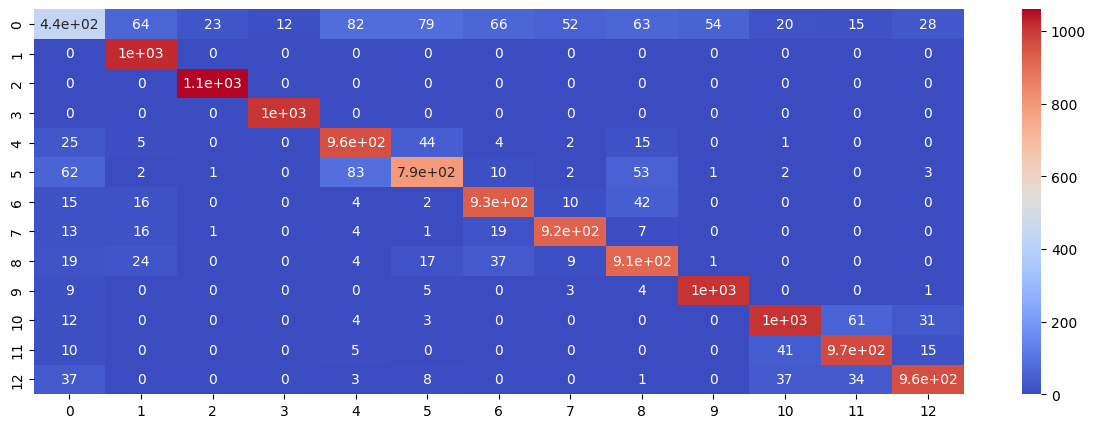

In [128]:
conf_mat_5 = confusion_matrix(y_test, y_pred, labels=np.arange(0, 13, 1))
fig = plt.figure(figsize=(15, 5))
sns.heatmap(conf_mat_5, annot=True, cmap="coolwarm", ax=fig.add_subplot())
plt.show()

In [129]:
accuracy_5 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_5 * 100}%")

Accuracy: 89.15582000743771%


## Results

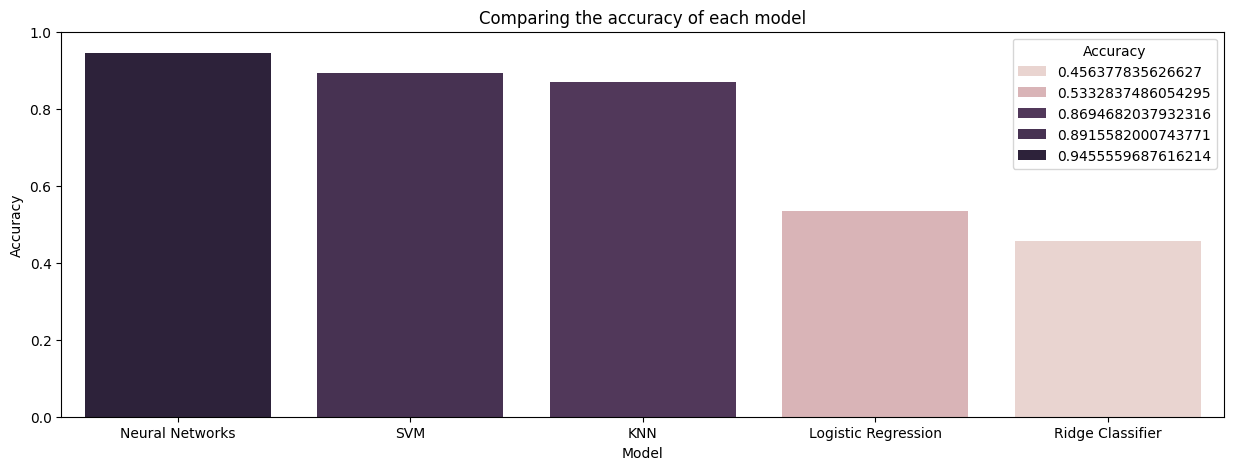

In [141]:
results_df = pd.DataFrame({"Model": ["Neural Networks", "Ridge Classifier", "Logistic Regression", "KNN", "SVM"], "Accuracy": [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5]})
results_df.sort_values("Accuracy", inplace=True, ascending=False)
plt.figure(figsize=(15, 5))
plt.title("Comparing the accuracy of each model")
plt.ylim(0, 1)
sns.barplot(results_df, x="Model", y="Accuracy", hue="Accuracy")
plt.show()

Comparing the classfication strength and weakness for each model


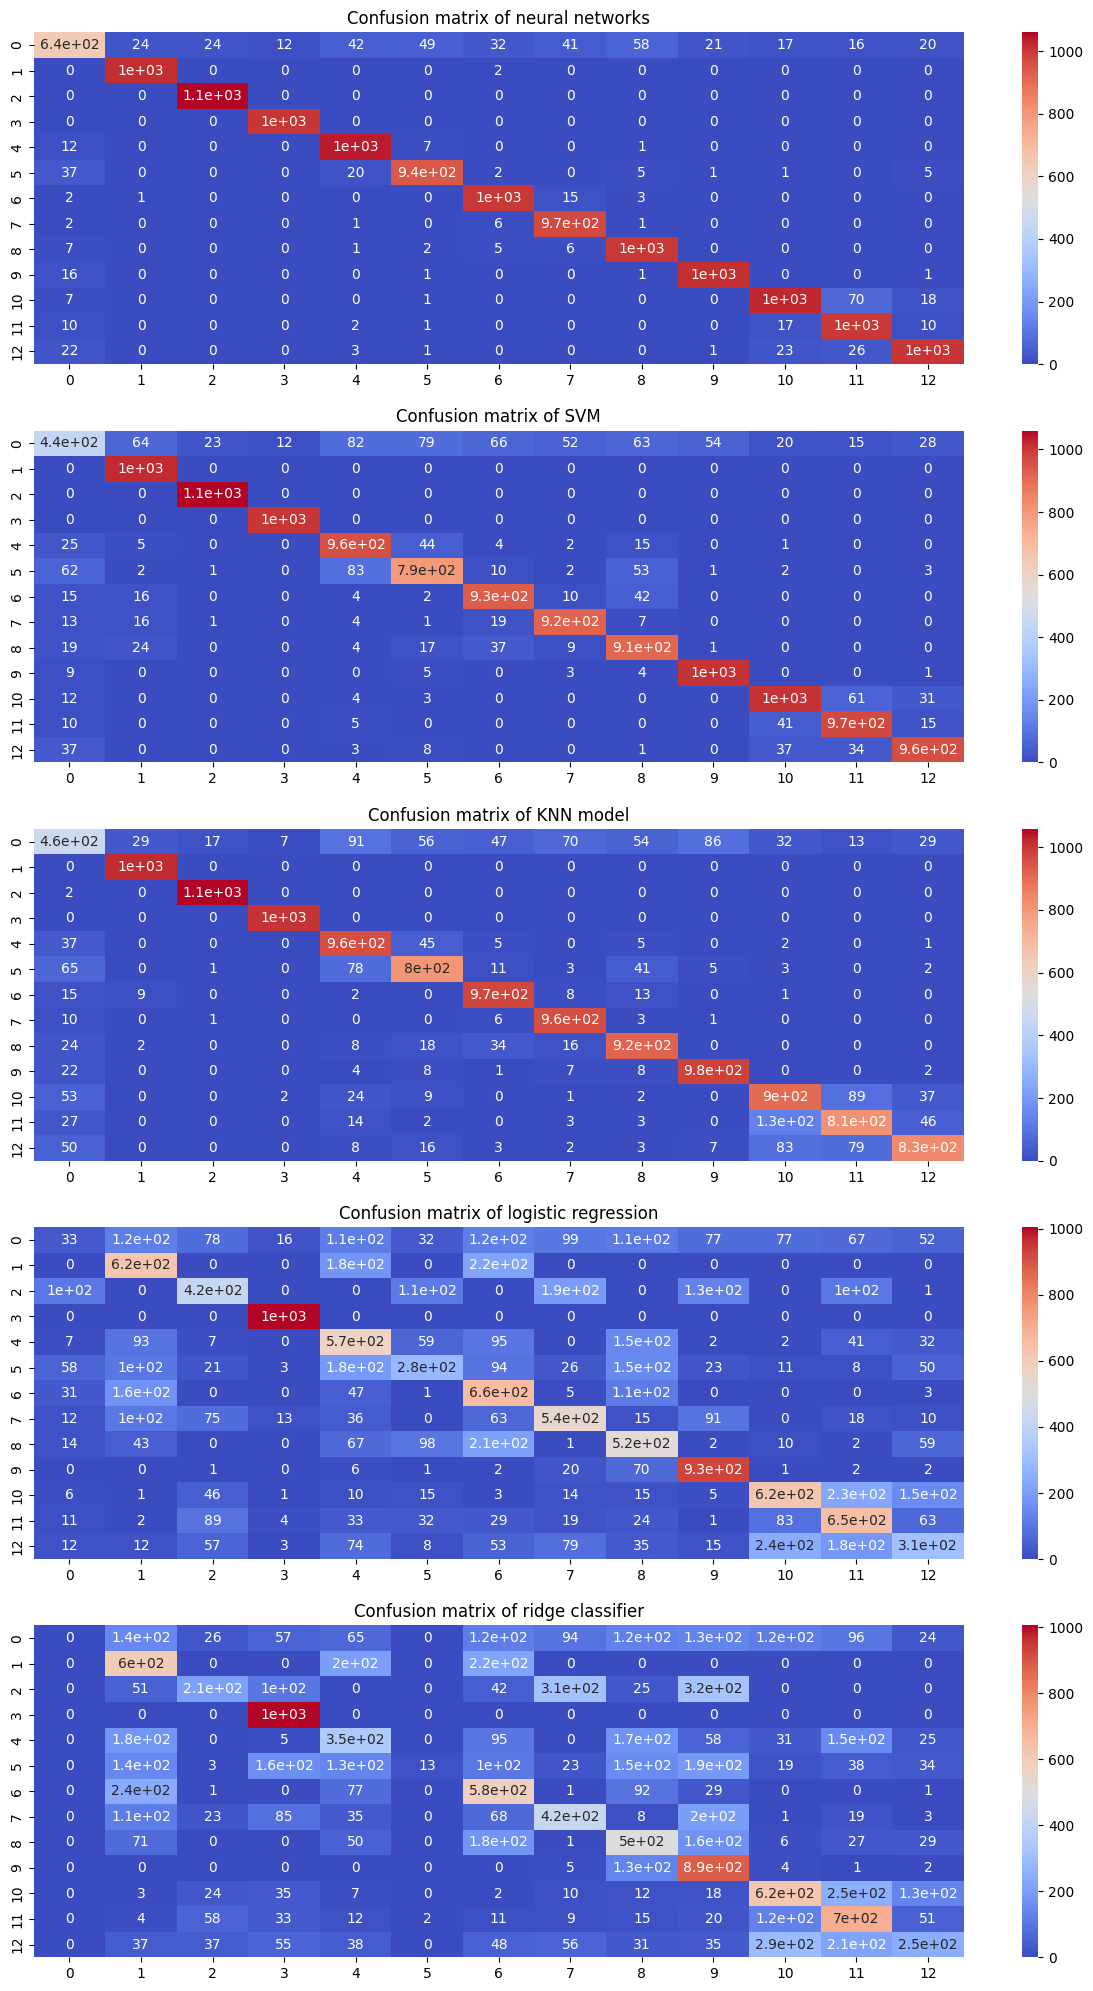

In [145]:
fig = plt.figure(figsize=(15, 25))

print("Comparing the classfication strength and weakness for each model")

ax1 = fig.add_subplot(5, 1, 1)
ax1.set_title("Confusion matrix of neural networks")
ax2 = fig.add_subplot(5, 1, 2)
ax2.set_title("Confusion matrix of SVM")
ax3 = fig.add_subplot(5, 1, 3)
ax3.set_title("Confusion matrix of KNN model")
ax4 = fig.add_subplot(5, 1, 4)
ax4.set_title("Confusion matrix of logistic regression")
ax5 = fig.add_subplot(5, 1, 5)
ax5.set_title("Confusion matrix of ridge classifier")

sns.heatmap(conf_mat_1, annot=True, cmap="coolwarm", ax=ax1)
sns.heatmap(conf_mat_5, annot=True, cmap="coolwarm", ax=ax2)
sns.heatmap(conf_mat_4, annot=True, cmap="coolwarm", ax=ax3)
sns.heatmap(conf_mat_3, annot=True, cmap="coolwarm", ax=ax4)
sns.heatmap(conf_mat_2, annot=True, cmap="coolwarm", ax=ax5)

plt.show()

The best performing model is the neural networks as we see in the accuracy per model plot and confusion matrix also SVM and KNN performed good in classification but due to that the data is not linearly seperable, the logistic regression and ridge classifier didn't do well

## Conclusion

At the end of this project, it was found that we can use sensor reading weared by people to track their activity and the recognition will be accurate almostly 95% which can help us in many fields like medical, sports and etc..

The best model found:
Neural networks and specifically multi-layer neural networks